In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import string
import numpy as np
import random
from collections import Counter

In [2]:
import nltk
nltk.download('punkt')
#from nltk.tokenize import sent_tokenize
import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /home/joseph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
try:
    total_df = pd.read_pickle('total_df.p')
except:
    df_1 = pd.read_csv('articles1.csv')
    df_2 = pd.read_csv('articles2.csv')
    df_3 = pd.read_csv('articles3.csv')
    #print(df_1.head(1))
    print(df_1.shape)

    #print(df_1.publication.unique())
    #print(df_2.publication.unique())
    #print(df_3.publication.unique())
    #merge dataframes
    total_df = pd.concat([df_1, df_2, df_3])
    df_1 = 0
    df_2 = 0
    df_3 = 0
    total_df['sentence_count'] = 0
    total_df['word_count'] = 0
    total_df.to_pickle('total_df.p')
publication_names = total_df.publication.unique()

In [ ]:
total_df.publication.value_counts().plot(kind='bar')

In [ ]:
#print(list(total_df))
#print(total_df.loc[total_df['publication'] == 'New York Times']['title'])

In [66]:
#nyt_list = total_df.loc[total_df['publication'] == 'New York Times']['content'].tolist()
nyt_df = total_df.loc[total_df['publication'] == 'New York Times']
nyt_semic = nyt_df[nyt_df['content'].str.contains(";")]
#breit_list = total_df.loc[total_df['publication'] == 'Breitbart']['content'].tolist()
#wapo_list = total_df.loc[total_df['publication'] == 'Washington Post']['content'].tolist()

In [67]:
print(nyt_semic.shape)

(0, 12)


In [18]:
def rand_list(num_articles):
    return [random.random() for _ in range(num_articles)]

In [21]:
def get_id_content_list(pubname, num_articles):
    df_cont_list = total_df.loc[total_df['publication'] == pubname]['content'].tolist()
    df_id_list = total_df.loc[total_df['publication'] == pubname]['id'].tolist()
    num_articles_in_set = len(df_id_list)
    num_rand_to_get = num_articles_in_set if num_articles > num_articles_in_set else num_articles
    if num_articles > num_articles_in_set:
        print('Warning!', pubname, 'only has ', str(len(df_id_list)), ' articles, but you are asking for ', str(num_articles))
    random_num_list = rand_list(num_articles_in_set)
    cont_list = [i for ci,i in enumerate(df_cont_list) if random_num_list[ci] > 1-num_rand_to_get/num_articles_in_set]
    id_list =   [i for ci,i in enumerate(df_id_list)   if random_num_list[ci] > 1-num_rand_to_get/num_articles_in_set]
    return cont_list, id_list

In [23]:
num_articles = 3000

nyt_list, nyt_id = get_id_content_list('New York Times', num_articles)

breit_list, breit_id = get_id_content_list('Breitbart', num_articles)
wapo_list, wapo_id = get_id_content_list('Washington Post', num_articles)
print(len(nyt_list), len(breit_list), len(wapo_list))
print(nyt_list[0][:200], nyt_id[0])

3040 2990 3056
After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from   windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze 17284


In [24]:
def prepare_text(publication_content_list):
    #lower case text
    lower_case = [text.strip().lower() for text in publication_content_list]
    #replace strange quote characters with normal ones 
    replace_quotes = [text.replace('“', '"').replace('”', '"') for text in lower_case]
    #do punkt sentence tokenization
    sentence_tokenize = [sent_detector.tokenize(text.strip()) for text in replace_quotes]
    #do nltk word tokenization
    word_tokenize = [nltk.word_tokenize(text) for text in replace_quotes]
    #get unique string counts
    string_counts = [Counter(text) for text in word_tokenize]
    return sentence_tokenize, word_tokenize, string_counts

In [25]:
nyt_sent, nyt_word, nyt_string_count = prepare_text(nyt_list)

In [26]:
breit_sent, breit_word, breit_string_count = prepare_text(breit_list)

In [27]:
wapo_sent, wapo_word, wapo_string_count = prepare_text(wapo_list)

In [28]:
pickle.dump( ['nyt', nyt_id, nyt_sent, nyt_word, nyt_string_count], open( "nyt_tokenized_strings.p", "wb" ) )
pickle.dump( ['breit', breit_id, breit_sent, breit_word, breit_string_count], open( "breit_tokenized_strings.p", "wb" ) )
pickle.dump( ['wapo', wapo_id, wapo_sent, wapo_word, wapo_string_count], open( "wapo_tokenized_strings.p", "wb" ) )

# ['breit', breit_sent, breit_word, breit_string_count],
# ['wapo', wapo_sent, wapo_word, wapo_string_count]]

# Can start here if you don't care about which articles you got, and you have the article pickle files

In [3]:
#unpickle files
pub, nyt_id, nyt_sent, nyt_word, nyt_string_count = pickle.load( open( "nyt_tokenized_strings.p", "rb" ) )
pub, breit_id, breit_sent, breit_word, breit_string_count = pickle.load( open( "breit_tokenized_strings.p", "rb" ) )
pub, wapo_id, wapo_sent, wapo_word, wapo_string_count = pickle.load( open( "wapo_tokenized_strings.p", "rb" ) )

# word count

In [5]:
nyt_wc = [len(text) for text in nyt_word]
breit_wc = [len(text) for text in breit_word]
wapo_wc = [len(text) for text in wapo_word]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([1.78082192e-04, 1.98630137e-04, 7.53424658e-05, 1.02739726e-04,
        1.43835616e-04, 2.80821918e-04, 3.08219178e-04, 2.32876712e-04,
        2.67123288e-04, 5.13698630e-04, 5.00000000e-04, 5.27397260e-04,
        6.71232877e-04, 7.53424658e-04, 6.36986301e-04, 7.12328767e-04,
        4.86301370e-04, 7.39726027e-04, 1.09589041e-03, 1.38356164e-03,
        1.19178082e-03, 9.31506849e-04, 6.43835616e-04, 5.82191781e-04,
        6.09589041e-04, 5.06849315e-04, 4.86301370e-04, 5.34246575e-04,
        3.83561644e-04, 4.93150685e-04, 4.58904110e-04, 3.63013699e-04,
        3.01369863e-04, 3.01369863e-04, 2.67123288e-04, 3.49315068e-04,
        3.15068493e-04, 2.12328767e-04, 2.46575342e-04, 1.78082192e-04,
        1.43835616e-04, 6.84931507e-05, 1.36986301e-04, 1.23287671e-04,
        6.84931507e-05, 8.90410959e-05, 8.21917808e-05, 6.84931507e-05,
        5.47945205e-05]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750

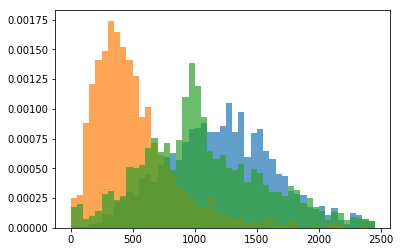

In [6]:
plt.hist(nyt_wc, bins = list(range(0,2500,50)),   normed = True, alpha = 0.7)
plt.hist(breit_wc, bins = list(range(0,2500,50)), normed = True, alpha = 0.7)
plt.hist(wapo_wc, bins = list(range(0,2500,50)),  normed = True, alpha = 0.7)

# Sentence Count

In [7]:
nyt_sent_count = [len(text) for text in nyt_sent]
breit_sent_count = [len(text) for text in breit_sent]
wapo_sent_count = [len(text) for text in wapo_sent]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([3.75989446e-03, 2.90237467e-03, 6.06860158e-03, 8.44327177e-03,
        1.36543536e-02, 1.51055409e-02, 1.53034301e-02, 1.91292876e-02,
        1.84696570e-02, 1.76781003e-02, 1.43799472e-02, 1.25329815e-02,
        1.00923483e-02, 8.44327177e-03, 6.59630607e-03, 6.53034301e-03,
        4.22163588e-03, 2.63852243e-03, 2.04485488e-03, 1.71503958e-03,
        2.17678100e-03, 4.61741425e-04, 9.23482850e-04, 9.23482850e-04,
        8.57519789e-04, 5.27704485e-04, 8.57519789e-04, 2.63852243e-04,
        2.63852243e-04, 3.95778364e-04, 2.63852243e-04, 2.63852243e-04,
        2.63852243e-04, 1.31926121e-04, 2.63852243e-04, 6.59630607e-05,
        1.31926121e-04, 6.59630607e-05, 1.31926121e-04, 0.00000000e+00,
        1.97889182e-04, 2.63852243e-04, 6.59630607e-05, 0.00000000e+00,
        1.31926121e-04, 6.59630607e-05, 6.59630607e-05, 1.31926121e-04,
        1.31926121e-04]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,

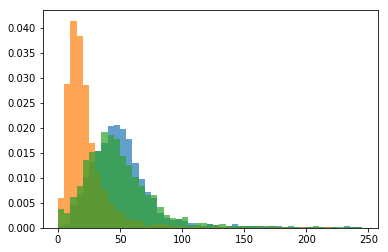

In [8]:
plt.hist(nyt_sent_count,   bins = list(range(0,250,5)), normed = True, alpha = 0.7)
plt.hist(breit_sent_count, bins = list(range(0,250,5)), normed = True, alpha = 0.7)
plt.hist(wapo_sent_count,  bins = list(range(0,250,5)), normed = True, alpha = 0.7)

# Sentence Length

In [9]:
nyt_sent_len = [i/j for i,j in zip(nyt_wc, nyt_sent_count)]
breit_sent_len = [i/j for i,j in zip(breit_wc, breit_sent_count)]
wapo_sent_len = [i/j for i,j in zip(wapo_wc, wapo_sent_count)]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00065638, 0.00065638,
        0.00131277, 0.00131277, 0.00361011, 0.00459468, 0.00656383,
        0.01542501, 0.02166065, 0.02691172, 0.04069577, 0.04955694,
        0.06990482, 0.06924844, 0.08368887, 0.08500164, 0.09287824,
        0.08631441, 0.078766  , 0.06531014, 0.04758779, 0.04069577,
        0.03610108, 0.02592714, 0.0157532 , 0.00754841, 0.00492287,
        0.00492287, 0.00295372, 0.00295372, 0.00295372, 0.00032819,
        0.00065638, 0.00032819, 0.00065638, 0.        , 0.00032819,
        0.00032819, 0.00032819, 0.00032819, 0.00032819]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

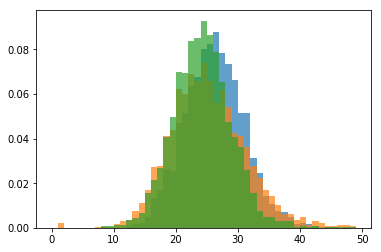

In [10]:
plt.hist(nyt_sent_len,   bins = list(range(0,50,1)), normed = True, alpha = 0.7)
plt.hist(breit_sent_len, bins = list(range(0,50,1)), normed = True, alpha = 0.7)
plt.hist(wapo_sent_len,  bins = list(range(0,50,1)), normed = True, alpha = 0.7)

# Unique Word Count and Fraction

In [11]:
translator = str.maketrans('', '', string.punctuation + '”“')
print(string.punctuation)
punctuation_set = set(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
nyt_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in nyt_word]
#nyt_unique_wc_old = [len(set(text.lower().translate(translator).split())) for text in nyt_list]
#print(nyt_unique_wc[:10], nyt_unique_wc_old[:10])
breit_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in breit_word]
wapo_unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in wapo_word]


#breit_unique_wc = [len(set(text.lower().translate(translator).split())) for text in breit_list]
#wapo_unique_wc = [len(set(text.lower().translate(translator).split())) for text in wapo_list]

In [13]:
nyt_unique_word_frac = [float(i/j) for i,j in zip(nyt_unique_wc, nyt_wc)]
breit_unique_word_frac = [float(i/j) for i,j in zip(breit_unique_wc, breit_wc)]
wapo_unique_word_frac = [float(i/j) for i,j in zip(wapo_unique_wc, wapo_wc)]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03274394, 0.03274394, 0.        , 0.03274394,
        0.03274394, 0.        , 0.03274394, 0.        , 0.03274394,
        0.06548788, 0.        , 0.03274394, 0.06548788, 0.13097577,
        0.03274394, 0.06548788, 0.16371971, 0.13097577, 0.        ,
        0.32743942, 0.29469548, 0.39292731, 0.65487885, 0.81859856,
        1.11329404, 1.80091683, 2.35756385, 3.0124427 , 4.19122462,
        5.92665357, 6.31958088, 6.58153242, 6.58153242, 6.97445972,
        6.38506876, 7.69482646, 5.89390963, 5.53372626, 4.55140799,
        3.66732155, 3.79829731, 2.1611002 , 1.63719712, 1.702685  ,
        1.63719712, 0.68762279, 0.88408644, 0.52390308, 0.45841519,
        0.42567125, 0.29469548, 0.29469548, 0.2292076 , 0.39292731,
        0.32743942, 0.13097577, 0.16371971, 0.13097577, 0.09823183,
        0.09823183, 0.19646365, 0.06548788, 0.09823183, 0.06548788,
        0.        , 0.13097577, 0.09823183, 0.09

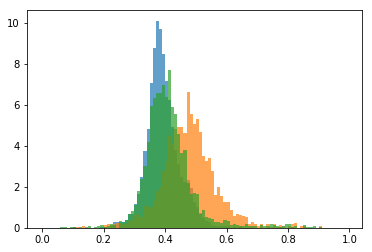

In [14]:
plt.hist(nyt_unique_word_frac,   bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha=0.7)
plt.hist(breit_unique_word_frac, bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha = 0.7)
plt.hist(wapo_unique_word_frac,  bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha = 0.7)

# Mean word length

In [15]:
nyt_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in nyt_word]
breit_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in breit_word]
wapo_word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in wapo_word]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0065445 , 0.0065445 , 0.01308901, 0.01963351,
        0.0065445 , 0.05235602, 0.05890052, 0.07198953, 0.10471204,
        0.09162304, 0.20942408, 0.32068063, 0.34685864, 0.41230366,
        0.62827225, 0.69371728, 0.79842932, 0.9947644 , 1.34162304,
        1.34162304, 1.66884817, 1.77356021, 1.68193717, 1.38743455,
        1.31544503, 1.23036649, 0.95549738, 0.64790576, 0.64136126,
        0.32722513, 0.28795812, 0.19633508, 0.09816754, 0.06544503,
        0.03272251, 0.01963351, 0.02617801, 0.0065445 , 0.03272251,
        0.01963351, 0.0065445 , 0.01308901, 0.0065445 , 0.0065445 ,
        0.        , 0.0065445 , 0.        , 0.0065445 , 0.        ,
        0.0065445 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0065445 , 0.0065445 , 0.        , 0.  

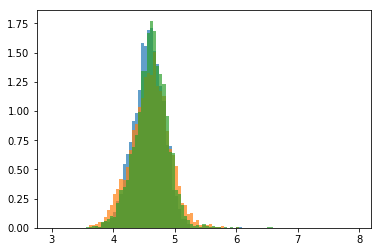

In [16]:
plt.hist(nyt_word_len,   bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha=0.7)
plt.hist(breit_word_len, bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha = 0.7)
plt.hist(wapo_word_len,  bins = [i/100. for i in list(range(300,800,5))], normed = True, alpha = 0.7)

# Sentence length distribution

In [17]:
nyt_sent_len_std = [np.std([len(sent) for sent in text]) for text in nyt_sent]
breit_sent_len_std = [np.std([len(sent) for sent in text]) for text in breit_sent]
wapo_sent_len_std = [np.std([len(sent) for sent in text]) for text in wapo_sent]

In [18]:
print([len(sent) for sent in nyt_sent[0]],nyt_sent_len_std[:10])

[201, 190, 94, 223, 83, 272, 215, 59, 90, 83, 115, 200, 114, 142, 141, 48, 179, 105, 131, 53, 126, 126, 329, 34, 84, 20, 194, 200, 297, 228, 32, 109, 174, 83, 217, 111, 18, 128, 117, 204, 89, 253, 117, 53, 162, 321, 20, 100, 77, 50, 239, 105, 130, 282, 253, 86, 262, 169, 185, 78, 65, 112, 30, 90, 244, 287, 41, 81, 86, 142, 127, 197, 153, 81, 94, 87, 161, 161, 86, 61, 66, 82, 142, 53, 141, 75, 86, 245, 232, 317, 124, 129, 25, 140, 133, 52, 76, 346, 60, 107, 152, 105, 318, 162, 242, 65, 70, 41, 184, 192, 112, 94, 155, 278, 78, 187, 181, 197, 134, 208, 232, 335, 71, 177, 262, 123, 94, 134, 192, 194, 131, 166, 129, 169, 119, 43, 251, 235, 172, 196, 74, 57, 30, 47, 141, 203, 273, 203, 104, 67, 121, 80, 155, 71, 85, 142, 112, 217, 99, 93, 163, 213, 64, 115, 97, 34, 121, 70, 119, 66, 244, 75, 60, 132, 22, 70, 84, 159, 77, 57, 85, 23, 86, 80, 54, 127, 48, 63, 75, 112, 86, 47, 71, 60, 168, 52, 58, 52, 129, 106, 177, 166, 75, 60, 193, 193, 107, 128, 190, 64, 36, 37] [73.44184736191093, 96.948131

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.0019685 , 0.00016404, 0.        , 0.00032808, 0.        ,
        0.00016404, 0.00032808, 0.00016404, 0.00016404, 0.        ,
        0.        , 0.00016404, 0.        , 0.00016404, 0.00016404,
        0.00016404, 0.00114829, 0.00032808, 0.00098425, 0.00164042,
        0.00360892, 0.00328084, 0.00410105, 0.00574147, 0.00524934,
        0.00770997, 0.01213911, 0.01312336, 0.01689633, 0.02099738,
        0.0214895 , 0.02542651, 0.02345801, 0.02870735, 0.03248031,
        0.02559055, 0.02952756, 0.0265748 , 0.02378609, 0.02526247,
        0.02296588, 0.01755249, 0.01541995, 0.01246719, 0.01295932,
        0.00951444, 0.00738189, 0.00787402, 0.00492126, 0.00410105,
        0.00180446, 0.00492126, 0.00213255, 0.00262467, 0.0019685 ,
        0.00180446, 0.00032808, 0.00065617, 0.00082021, 0.00098425,
        0.        , 0.        , 0.00032808, 0.        , 0.00016404,
        0.00032808, 0.00032808, 0.        , 0.00032808, 0.00016404,
        0.00016404, 0.        , 0.00016404, 0.  

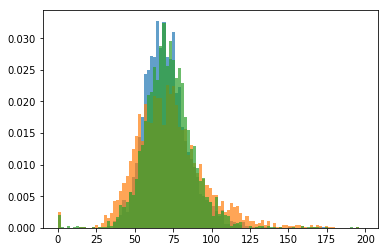

In [19]:
plt.hist(nyt_sent_len_std,   bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha=0.7)
plt.hist(breit_sent_len_std, bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha = 0.7)
plt.hist(wapo_sent_len_std,  bins = [i/1. for i in list(range(0,200,2))], normed = True, alpha = 0.7)

# Commas per sentence

In [20]:
nyt_cps = [counter[',']/sent_num for counter, sent_num in zip(nyt_string_count, nyt_sent_count)]
breit_cps = [counter[',']/sent_num for counter, sent_num in zip(breit_string_count, breit_sent_count)]
wapo_cps = [counter[',']/sent_num for counter, sent_num in zip(wapo_string_count, wapo_sent_count)]

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.04593176, 0.        , 0.        , 0.01312336, 0.00656168,
        0.03937008, 0.11811024, 0.04593176, 0.0984252 , 0.10498688,
        0.26246719, 0.24278215, 0.41994751, 0.5183727 , 0.55774278,
        0.80708661, 0.99081365, 1.1023622 , 1.12204724, 1.02362205,
        1.73228346, 1.41076115, 1.37139108, 1.06299213, 1.10892388,
        1.01706037, 0.81364829, 0.78740157, 0.67585302, 0.52493438,
        0.46587927, 0.22309711, 0.30839895, 0.14435696, 0.13779528,
        0.14435696, 0.11154856, 0.0656168 , 0.0656168 , 0.0328084 ,
        0.10498688, 0.01968504, 0.03937008, 0.00656168, 0.        ,
        0.02624672, 0.02624672, 0.01312336, 0.01312336, 0.        ,
        0.01312336, 0.        , 0.        , 0.00656168, 0.00656168,
        0.        , 0.        , 0.        , 0.        ]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.

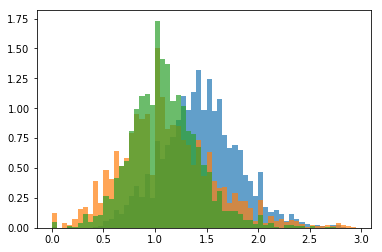

In [21]:
plt.hist(nyt_cps,   bins = [i/100. for i in list(range(0,300,5))], normed = True, alpha = 0.7)
plt.hist(breit_cps, bins = [i/100. for i in list(range(0,300,5))], normed = True, alpha = 0.7)
plt.hist(wapo_cps,  bins = [i/100. for i in list(range(0,300,5))], normed = True, alpha = 0.7)

# semicolons per sentence

In [35]:
#print( nyt_sent[0])
nyt_semic_ps = [float(counter['really']/sent_num) for counter, sent_num in zip(nyt_string_count, nyt_sent_count)]
breit_semic_ps = [float(counter['really']/sent_num) for counter, sent_num in zip(breit_string_count, breit_sent_count)]
wapo_semic_ps = [float(counter['really']/sent_num) for counter, sent_num in zip(wapo_string_count, wapo_sent_count)]
print(np.mean(nyt_semic_ps), np.mean(breit_semic_ps), np.mean(wapo_semic_ps))
#print(nyt_semic_ps[:1000])

0.007860312566494502 0.008560954135035758 0.007897949009766132


/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([3.64980289e+02, 1.64257556e-01, 1.14980289e+00, 2.95663601e+00,
        4.10643890e+00, 3.44940867e+00, 1.06767411e+01, 1.08409987e+01,
        1.16622865e+01, 8.04862024e+00, 1.14980289e+01, 1.06767411e+01,
        6.40604468e+00, 5.91327201e+00, 6.07752957e+00, 4.27069645e+00,
        4.76346912e+00, 3.94218134e+00, 2.79237845e+00, 2.13534823e+00,
        3.28515112e+00, 1.64257556e+00, 1.97109067e+00, 1.47831800e+00,
        3.28515112e-01, 1.97109067e+00, 1.47831800e+00, 1.47831800e+00,
        8.21287779e-01, 1.64257556e+00, 6.57030223e-01, 1.14980289e+00,
        4.92772668e-01, 1.64257556e-01, 6.57030223e-01, 3.28515112e-01,
        0.00000000e+00, 3.28515112e-01, 1.47831800e+00, 3.28515112e-01,
        4.92772668e-01, 1.64257556e-01, 3.28515112e-01, 0.00000000e+00,
        1.64257556e-01, 4.92772668e-01, 0.00000000e+00, 1.64257556e-01,
        0.00000000e+00]),
 array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
        0.018, 0.02 , 0.022, 0.024, 0.0

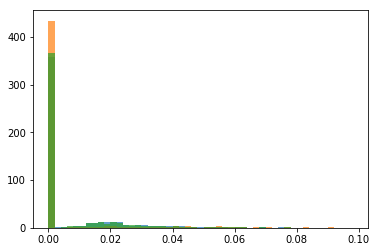

In [40]:
plt.hist(nyt_semic_ps,   bins = [i/500. for i in list(range(0,50,1))], normed = True, alpha = 0.7)
plt.hist(breit_semic_ps, bins = [i/500. for i in list(range(0,50,1))], normed = True, alpha = 0.7)
plt.hist(wapo_semic_ps,  bins = [i/500. for i in list(range(0,50,1))], normed = True, alpha = 0.7)

In [41]:
from sklearn import tree
#X = [[0, 0], [1, 1]]
#Y = [0, 1]
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, Y)

In [75]:
#join data
wc = nyt_wc + breit_wc + wapo_wc
sent_len = nyt_sent_len + breit_sent_len + wapo_sent_len
sent_len_std = nyt_sent_len_std + breit_sent_len_std + wapo_sent_len_std
unique_word_frac = nyt_unique_word_frac + breit_unique_word_frac + wapo_unique_word_frac
word_len = nyt_word_len + breit_word_len + wapo_word_len
cps = nyt_cps + breit_cps + wapo_cps
semic_ps = nyt_semic_ps + breit_semic_ps + wapo_semic_ps
#print(len(wc), len(word_length))

In [141]:
#combine features
X = [[i, j, k, l, m] for i, j, k, l, m in zip(sent_len, sent_len_std, unique_word_frac, word_len, cps)]

In [142]:
#labels
Y = [0 for i in range(len(nyt_wc))] + [1 for i in range(len(breit_wc))] + [2 for i in range(len(wapo_wc))]
print(len(Y))

9086


In [177]:
#test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:len(Y)], Y, test_size=0.6)

In [178]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'max_depth':range(3,20)}
#clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
#clf.fit(X=X_train, y=y_train)
#tree_model = clf.best_estimator_
#print (clf.best_score_, clf.best_params_) 


#clf = tree.DecisionTreeClassifier(max_depth = 5)
#clf = clf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [181]:
y_pred = clf.predict(X_test)
#chance = [0 if random.random() > 0.5 else 1 for _ in range(len(y_pred))]

[[1213.  246.  467.]
 [ 267. 1157.  460.]
 [ 377.  366.  899.]] 5452.0
Counter({0: 1857, 2: 1826, 1: 1769})


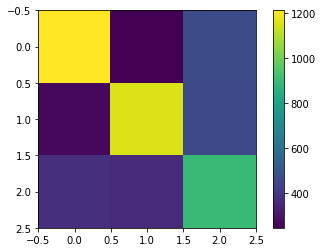

In [182]:
conf_mat = np.zeros((3,3))
for pred, true in zip(y_pred, y_test):
    conf_mat[pred,true] += 1.
#conf_mat[2,1] += 1000
#[y,x] format (first index (predicted) is on the vertical, second index (truth) is on the horizontal)
plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))
print(Counter(y_test))

In [183]:
from sklearn.externals import joblib
joblib.dump(clf, 'decision_tree_10.pkl') 

['decision_tree_10.pkl']

In [176]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

[[0.25628141 0.24221106 0.        ]
 [0.26582915 0.23567839 0.        ]
 [0.         0.         0.        ]] 1.0000000000000127


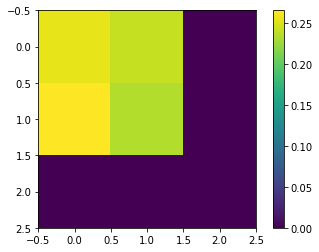

In [61]:
conf_mat = np.zeros((3,3))
for pred_chance, true in zip(chance, y_test):
    conf_mat[pred_chance,true] += 1./len(y_pred)

plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))

In [ ]:
total_df = 0

In [ ]:
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file='graph') 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 

In [ ]:
print(wapo_collect[0])

In [ ]:
#get content column into list
article_list = total_df['content'].tolist()
print(article_list[:10])

In [ ]:
word_count_list = [len(text.split()) for text in article_list[:10000]]
print(word_count_list[:100])

In [ ]:
translator = str.maketrans('', '', string.punctuation)
unique_word_list = [set(text.lower().translate(translator).split()) for text in article_list[:10000]]
print(unique_word_list[:1])
#df.loc[row, column] = pd.DataFrame({'fake_key': list})

ADD WORDCOUNT COLUMN

In [ ]:
def word_count(pub_name):
    total_df.loc[total_df['publication'] == pub_name, 'word_count'] = total_df.loc[total_df['publication'] == pub_name, 'content'].str.split().str.len()
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

In [ ]:
word_count('Washington Post')
word_count('New York Times')
word_count('Vox')
word_count('Fox News')
#print(total_df.loc[total_df['publication'] == 'Washington Post']['word_count'].head(20))
#wapo_group['word_count'] = wapo_group['content'].str.split().str.len()
#print(wapo_group['word_count'].head(20))

In [ ]:
print(total_df.groupby('publication')['word_count'].describe())

ADD SENTENCE LENGTH COLUMN

In [ ]:
def sentence_count(pub_name):
    total_df.loc[total_df['publication'] == pub_name, 'sentence_count'] = total_df.loc[total_df['publication'] == pub_name]['content'].apply(lambda row: len(sent_detector.tokenize(row.strip())))
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

#nyt_group['sentence_count'] = nyt_group['content']
#print(nyt_group.sentence_count)

In [ ]:
sentence_count('Washington Post')
sentence_count('New York Times')
sentence_count('Vox')
sentence_count('Fox News')
#sentence_count('')

In [ ]:
print(total_df.groupby('publication')['sentence_count'].describe())
#print(total_df.head(2))

In [ ]:
#plot word count vs sentence length
#total_df.groupby('publication').plot(x='word_count', y='sentence_count', style='o')
plt.scatter(total_df.loc[total_df['publication'] == 'New York Times','word_count'], total_df.loc[total_df['publication'] == 'New York Times','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Washington Post','word_count'], total_df.loc[total_df['publication'] == 'Washington Post','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Vox','word_count'], total_df.loc[total_df['publication'] == 'Vox','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Fox News','word_count'], total_df.loc[total_df['publication'] == 'Fox News','sentence_count'])

plt.xlim((0,5000))

plt.ylim((0,200))
plt.show()

In [ ]:
#total_df['unique_word_count'] = 0

In [ ]:
def unique_word_count(pub_name):
    col_name = 'unique_word_count'
    total_df.loc[total_df['publication'] == pub_name, col_name] = total_df.loc[total_df['publication'] == pub_name]['content'].apply(lambda row: len(set(row.lower().split())))
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

#nyt_group['sentence_count'] = nyt_group['content']
#print(nyt_group.sentence_count)

In [ ]:
#unique_word_count('New York Times')
#unique_word_count('Vox')
#unique_word_count('Washington Post')
unique_word_count('Fox News')
print(total_df.groupby('publication')['unique_word_count'].describe())

In [ ]:
#total_df.groupby('publication').plot(x='word_count', y='sentence_count', style='o')
plt.scatter(total_df.loc[total_df['publication'] == 'New York Times','sentence_count'], total_df.loc[total_df['publication'] == 'New York Times','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Washington Post','sentence_count'], total_df.loc[total_df['publication'] == 'Washington Post','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Vox','sentence_count'], total_df.loc[total_df['publication'] == 'Vox','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Fox News','sentence_count'], total_df.loc[total_df['publication'] == 'Fox News','unique_word_count'], s=4)

plt.xlim((0,200))

plt.ylim((0,1000))
plt.show()

In [ ]:
#sub_df_max_wordcount = sub_df
total_df.groupby('publication')['word_count'].hist(bins = 100, alpha = 0.5, normed = True)